# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combinedata_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combinedata_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [72]:
# Checking the number of mice.
num_mouse = len(pd.unique(combinedata_df['Mouse ID']))
num_mouse

249

In [73]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = combinedata_df.loc[combinedata_df.duplicated(subset = ['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mouse_dup

array(['g989'], dtype=object)

In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseID = combinedata_df.loc[combinedata_df["Mouse ID"] == "g989"]
mouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
ID_dup = combinedata_df.drop(combinedata_df.index[(combinedata_df["Mouse ID"] == "g989")], axis = 0, inplace = False)
ID_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [76]:
# Checking the number of mice in the clean DataFrame.
num_cleanmouse = len(pd.unique(ID_dup['Mouse ID']))
num_cleanmouse

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_mean = ID_dup.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
mouse_med = ID_dup.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
mouse_var = ID_dup.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
mouse_std = ID_dup.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
mouse_sem = ID_dup.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

regimen_summary = pd.DataFrame({"Mean Tumor Volume":mouse_mean,
                               "Median Tumor Volume":mouse_med,
                               "Tumor Volume Variance":mouse_var,
                               "Tumor Volume Std. Dev.":mouse_std,
                               "Tumor Volume Std. Err.":mouse_sem})
regimen_summary                           
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimenstats = ID_dup.groupby('Drug Regimen').agg(\
        Tumor_mean = ('Tumor Volume (mm3)', np.mean),\
        Tumor_median = ('Tumor Volume (mm3)', np.median),\
        Tumor_variance = ('Tumor Volume (mm3)', np.var),\
        Tumor_Stdev = ('Tumor Volume (mm3)', np.std),\
        Tumor_sem = ('Tumor Volume (mm3)', st.sem))
regimenstats

,Tumor_mean,Tumor_median,Tumor_variance,Tumor_Stdev,Tumor_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

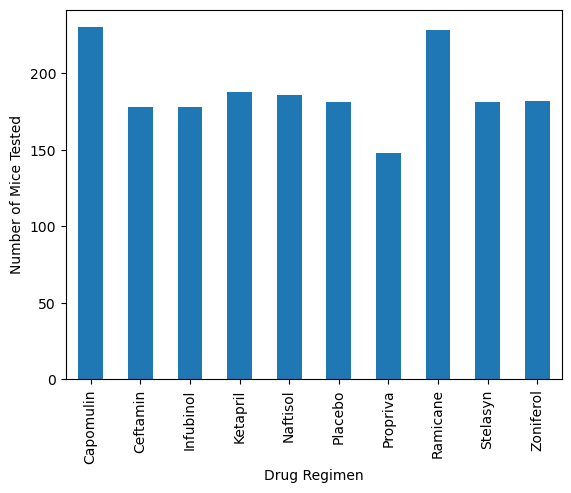

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_treatment = ID_dup.groupby(["Drug Regimen"]).count()["Mouse ID"]
chart_mouse = drug_treatment.plot.bar(x=["Drug Regimen"],ylabel = "Number of Mice Tested")
chart_mouse

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

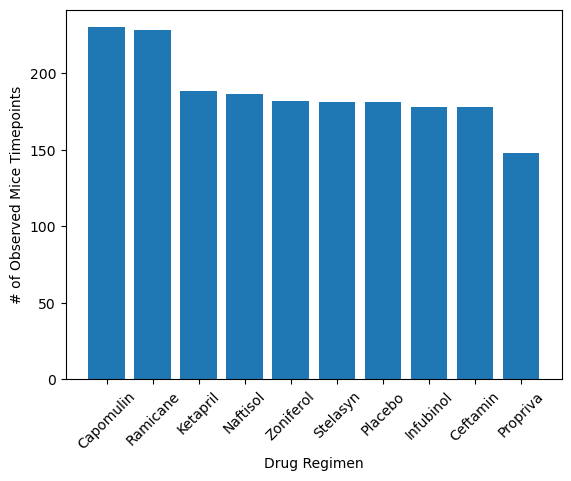

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
reg_rows = ID_dup['Drug Regimen'].value_counts()

x_axis = np.arange(len(reg_rows))

plt.bar(x_axis, reg_rows)

reg_loc = [value for value in x_axis]
plt.xticks(reg_loc, reg_rows.index.values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
plt.xticks(rotation=45)


In [81]:
gender_amount = combinedata_df.groupby("Sex")
group_count = pd.DataFrame(gender_amount["Sex"].count())
group_count.head()

,Sex
Sex,
Female,935
Male,958


<Axes: ylabel='Total Count'>

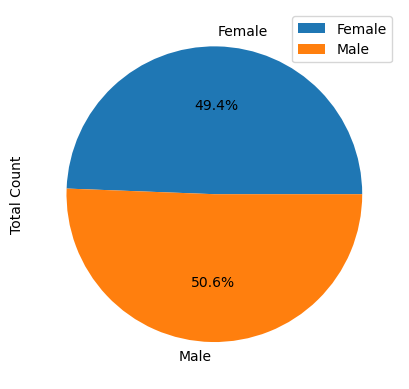

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderpie = pd.DataFrame({'Sex': ['Female', 'Male'], 
                          'Total Count': [935, 958]}) 
  
# Plotting the pie chart for above dataframe 
genderpie.groupby(['Sex']).sum().plot(kind='pie', y='Total Count', autopct='%1.1f%%')



<function matplotlib.pyplot.show(close=None, block=None)>

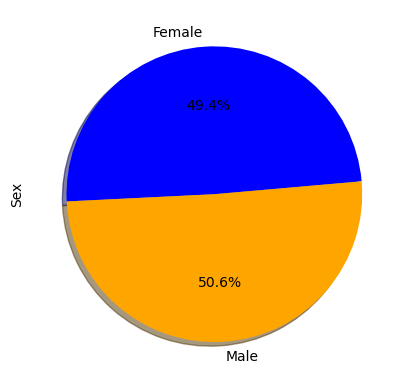

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
group_count.plot(kind='pie', y='Sex', \
                       startangle=5,\
                       autopct='%1.1f%%',shadow=True, colors =["blue","orange"],legend =False)
plt.show

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regtreatment = ID_dup.groupby(["Mouse ID"]).max()["Timepoint"]
regtreatment_df = pd.DataFrame(regtreatment)
regtreatment_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regmouse_study = pd.merge(regtreatment_df, ID_dup, how = "left", on = ["Mouse ID", "Timepoint"])

In [85]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvolume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in drug_list:
    drug_volume = regmouse_study[(regmouse_study["Drug Regimen"]==x)]["Tumor Volume (mm3)"]
    
    quartiles = drug_volume.quantile([.25,.5,.75])
    lowerqrt = quartiles[0.25]
    upperqrt = quartiles[0.75]
    iqr = upperqrt-lowerqrt
    lowerbound = lowerqrt - (1.5*iqr)
    upperbound = upperqrt + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvolume.append(drug_volume)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    outlier = drug_volume[(drug_volume > upperbound)|(drug_volume<lowerbound)]
    print(f"{x}'s potential outliers: {outlier}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x1bbe5a878b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbe5a85c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbe5a85330>,
 'medians': [<matplotlib.lines.Line2D at 0x1bbe5a85ae0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bbe5a84f70>,
 'means': []}

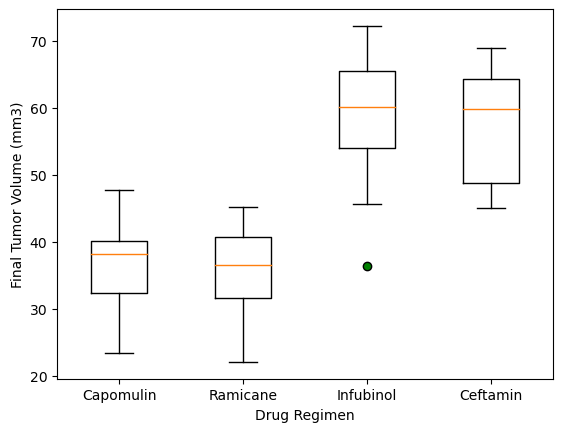

In [104]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumorvolume, flierprops = dict(markerfacecolor = 'g'), labels = drug_list)


## Line and Scatter Plots

C:\Users\caleb\AppData\Local\Temp\ipykernel_22236\2818643415.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  line_graph = ID_dup[(ID_dup["Drug Regimen"]=="Capomulin")][ID_dup["Mouse ID"]=="b128"]


Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

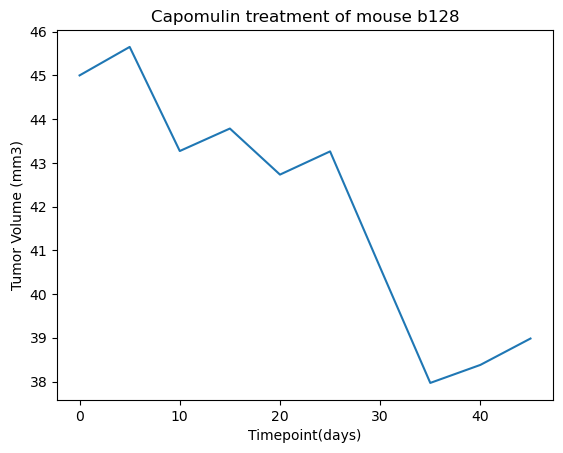

In [87]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_graph = ID_dup[(ID_dup["Drug Regimen"]=="Capomulin")][ID_dup["Mouse ID"]=="b128"]
xline = line_graph["Timepoint"]
yline = line_graph["Tumor Volume (mm3)"]
plt.plot(xline, yline)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")


<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

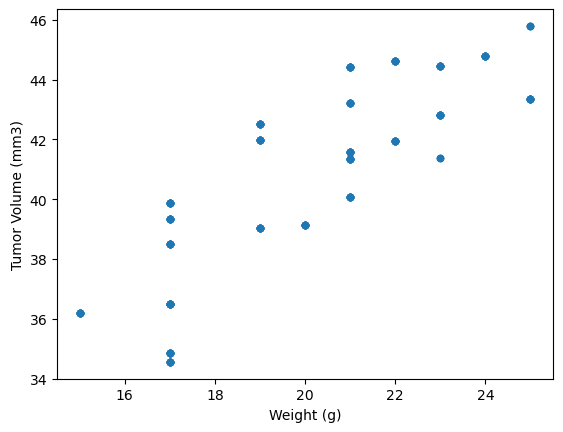

In [88]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = ID_dup[(ID_dup["Drug Regimen"]=="Capomulin")]
avgtumor=pd.DataFrame(capomulin_data.groupby(capomulin_data["Mouse ID"])["Tumor Volume (mm3)"].mean())
mouse_weight=capomulin_data.loc[:,["Weight (g)","Mouse ID"]]
scatter_graph=pd.merge(mouse_weight,avgtumor,how="left", on="Mouse ID")
scatter_graph.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


Text(0, 0.5, 'Tumor Volume (mm3)')

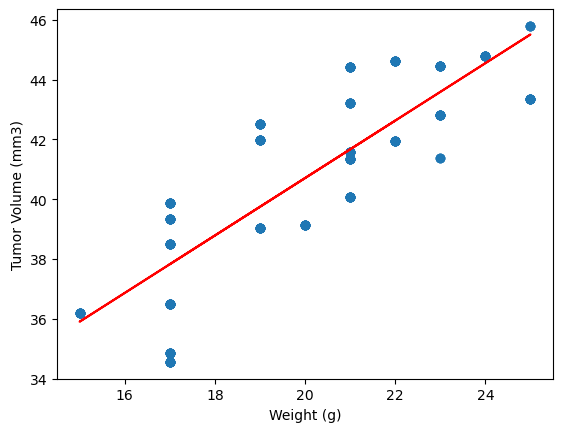

In [103]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouseW=scatter_graph.loc[:,"Weight (g)"]
MouseT=scatter_graph.loc[:,"Tumor Volume (mm3)"]
correlation_value=round((st.pearsonr(mouseW, MouseT))[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_value}")

#and linear regression model 
x_values = scatter_graph["Weight (g)"]
y_values = scatter_graph["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rvalues = x_values * slope + intercept
rvalues = x_values * slope + intercept
line_plot = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,rvalues,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")